In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3))

In [3]:
n_agents = 1
vision = 3
n_episodes =2000
update_factor = 100
len_game = 20
lr = 1e-3
train = trainer.Maze_Training('test',dataset,len_game,n_agents,vision,n_episodes = n_episodes,lr = lr,update_factor=update_factor)
train.train(lambda_entropy=0.5)
train.save()

episode 0
cumulative reward: [78.0]
episode 1
cumulative reward: [104.0]
episode 2
cumulative reward: [102.0]
episode 3
cumulative reward: [81.0]
episode 4
cumulative reward: [103.0]
episode 5
cumulative reward: [63.0]
episode 6
cumulative reward: [79.0]
episode 7
cumulative reward: [84.0]
episode 8
cumulative reward: [37.0]
episode 9
cumulative reward: [53.0]
episode 10
cumulative reward: [104.0]
episode 11
cumulative reward: [93.0]
episode 12
cumulative reward: [71.0]
episode 13
cumulative reward: [99.0]
episode 14
cumulative reward: [100.0]
episode 15
cumulative reward: [86.0]
episode 16
cumulative reward: [104.0]
episode 17
cumulative reward: [91.0]
episode 18
cumulative reward: [89.0]
episode 19
cumulative reward: [98.0]
episode 20
cumulative reward: [90.0]
episode 21
cumulative reward: [107.0]
episode 22
cumulative reward: [70.0]
episode 23
cumulative reward: [104.0]
episode 24
cumulative reward: [91.0]
episode 25
cumulative reward: [100.0]
episode 26
cumulative reward: [107.0]
e

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


episode 27 with loss 10.139437675476074
cumulative reward: [62.0]
episode 28
cumulative reward: [51.0]
episode 29
cumulative reward: [45.0]
episode 30
cumulative reward: [113.0]
episode 31
cumulative reward: [104.0]
episode 32
cumulative reward: [98.0]
episode 33
cumulative reward: [101.0]
episode 34
cumulative reward: [66.0]
episode 35
cumulative reward: [117.0]
episode 36
cumulative reward: [8.0]
episode 37
cumulative reward: [106.0]
episode 38
cumulative reward: [107.0]
episode 39
cumulative reward: [98.0]
episode 40
cumulative reward: [109.0]
episode 41
cumulative reward: [103.0]
episode 42
cumulative reward: [105.0]
episode 43
cumulative reward: [59.0]
episode 44
cumulative reward: [93.0]
episode 45
cumulative reward: [99.0]
episode 46
cumulative reward: [103.0]
episode 47
cumulative reward: [4.0]
episode 48
cumulative reward: [106.0]
episode 49
cumulative reward: [105.0]
episode 50
cumulative reward: [78.0]
episode 51
cumulative reward: [110.0]
episode 52
episode 52 with loss 5.2

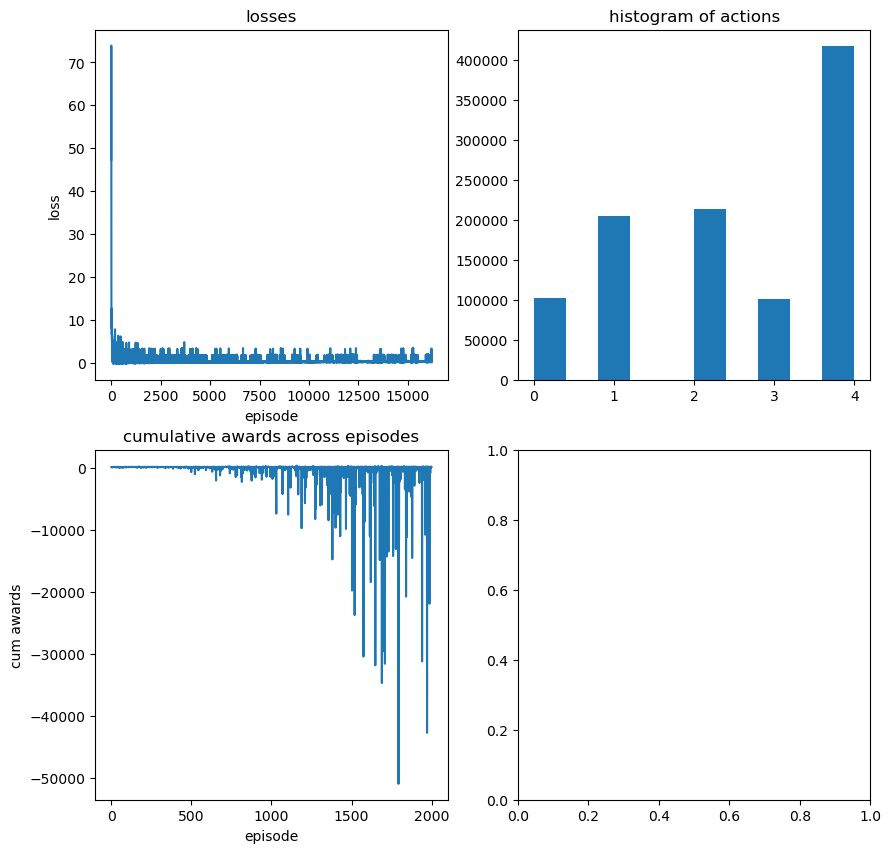

In [4]:
train.results()

In [7]:
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=1000,epsilon=0,sample_prob=True)


[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753]]
[[0.19184116 0.20099546 0.2031222  0.2023837  0.20165753

KeyboardInterrupt: 

: 

In [ ]:
import DQN.agent as agent

load = agent.CNN_Maze_Agents(3)
load.load('test')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:218: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.Q_fun.load_state_dict(torch.load(os.path.join(fd,

In [ ]:
load.run_agent(dataset.__getitem__(0))

KeyboardInterrupt: 